---
# Data Visualization

#### Notebook de Noe 👻👻

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 



---

### Matplotlib: estilo MATLAB

La API de matplotlib.pyplot tiene por defecto una interface al estilo MATLAB

---

In [3]:
# Vamos a crear un vector de datos
x = np.arange(-10,11)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

Text(0.5, 1.0, 'Mi primer plot')

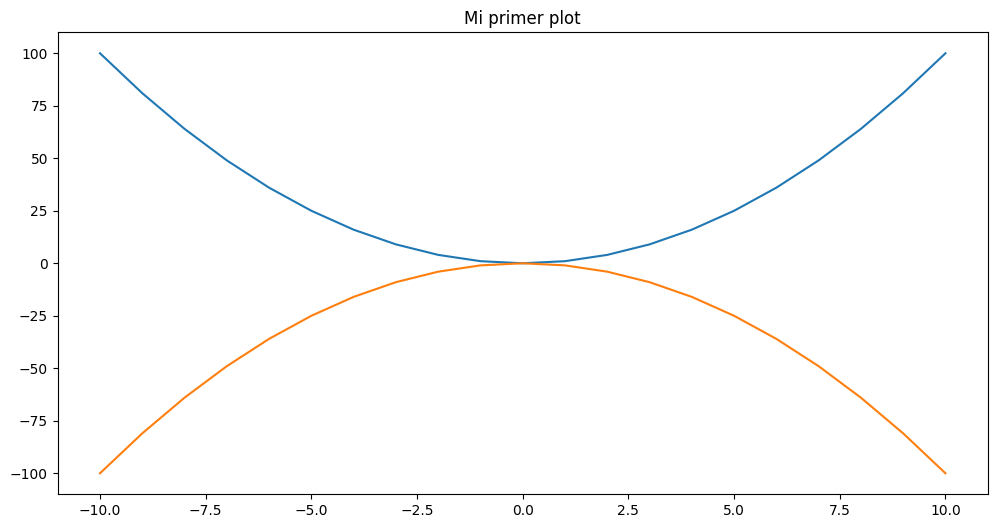

In [7]:
# Creamos una figura, estableciendo su tamaño
plt.figure(figsize=(12,6))
plt.plot(x,x**2)

plt.plot(x,-x**2)
plt.title("Mi primer plot")

---
### Subplots

---

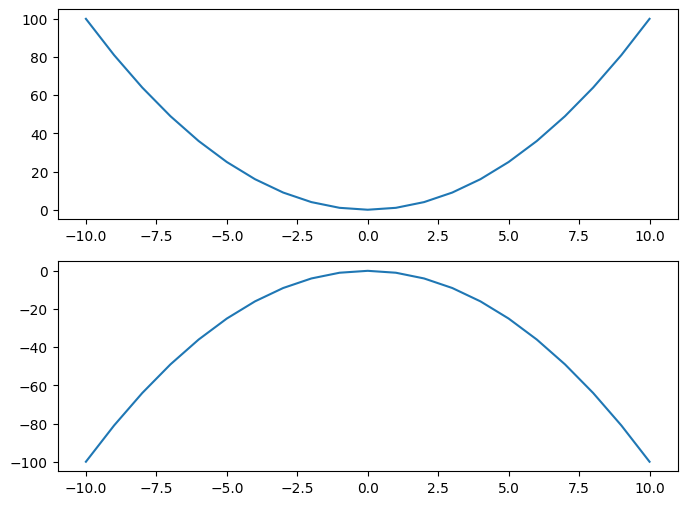

In [9]:
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(x,x**2)

plt.subplot(2,1,2)
plt.plot(x,-x**2)

Text(0, 0.5, 'Y')

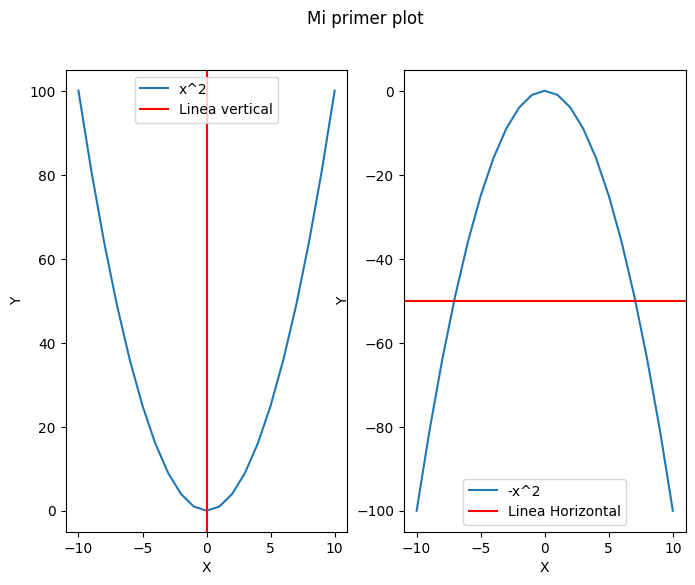

In [10]:
## Podemos tunear un poco mas estos graficos

plt.figure(figsize=(8,6))
# Titulo superior
plt.suptitle("Mi primer plot")

plt.subplot(1,2,1)
plt.plot(x,x**2)
plt.axvline(x=0,c='r') # Agregamos una linea vertical
plt.legend(["x^2", "Linea vertical"])
plt.xlabel("X") # Agregamos labels a los ejes
plt.ylabel("Y")

plt.subplot(1,2,2)
plt.plot(x,-x**2)
plt.axhline(y=-50,c='r')  # Agregamos una linea horizontal
plt.legend(["-x^2", "Linea Horizontal"])
plt.xlabel("X") # Agregamos labels a los ejes
plt.ylabel("Y")

---
### Matplotlib orientado a objetos



[Matplotlib documentation](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface "matplotlib page")

---

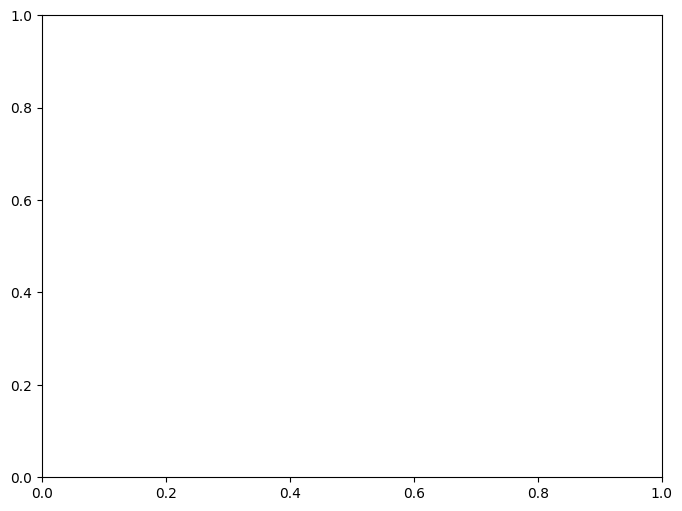

In [11]:
fig, axes = plt.subplots(figsize=(8,6))



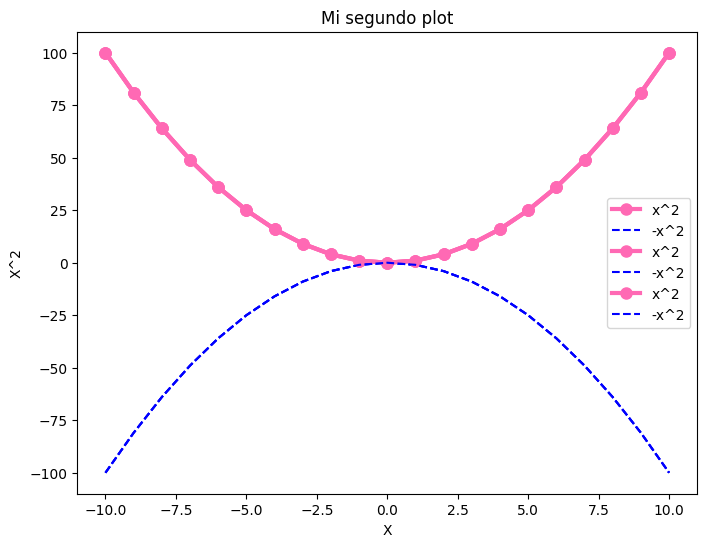

In [14]:
axes.plot(x,x**2, color="hotpink", lw=3, marker='o', ms=8, label='x^2')
axes.plot(x,-x**2,'b--',label="-x^2")
axes.set_xlabel("X")
axes.set_ylabel("X^2")
axes.set_title("Mi segundo plot")
axes.legend()


fig ## Cuidado!! sin esta linea el grafico no se muestra

## Cuidado, si lo ejecutan varias veces sin re-definir fig, axes = plt.figure()....
## Cada vez que lo ejecute se va a duplicar la leyenda

Text(0.5, 1.0, 'Mi tercer plot')

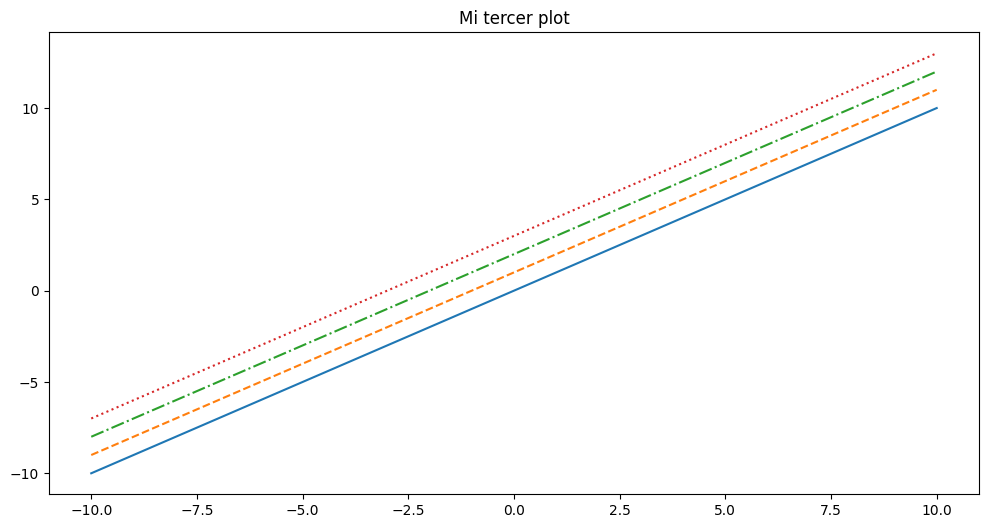

In [15]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("Mi tercer plot")

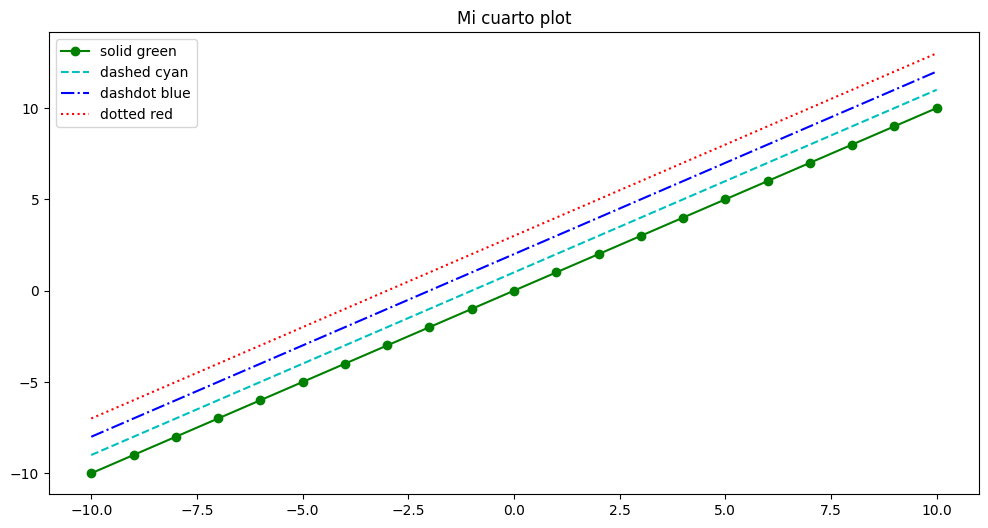

In [16]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("Mi cuarto plot")

axes.legend()

---
### subplots

---

(<Figure size 1400x600 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

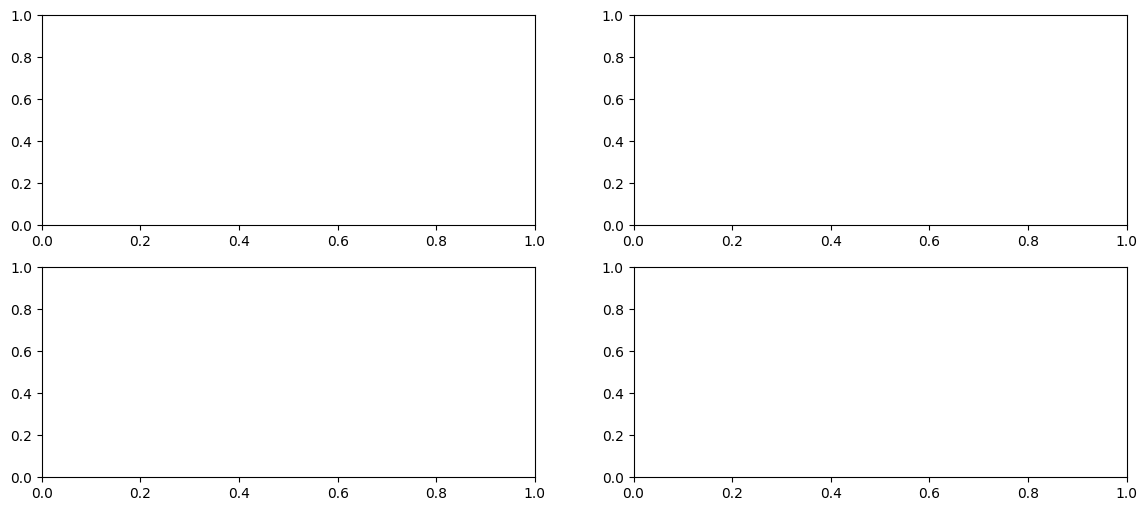

In [17]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

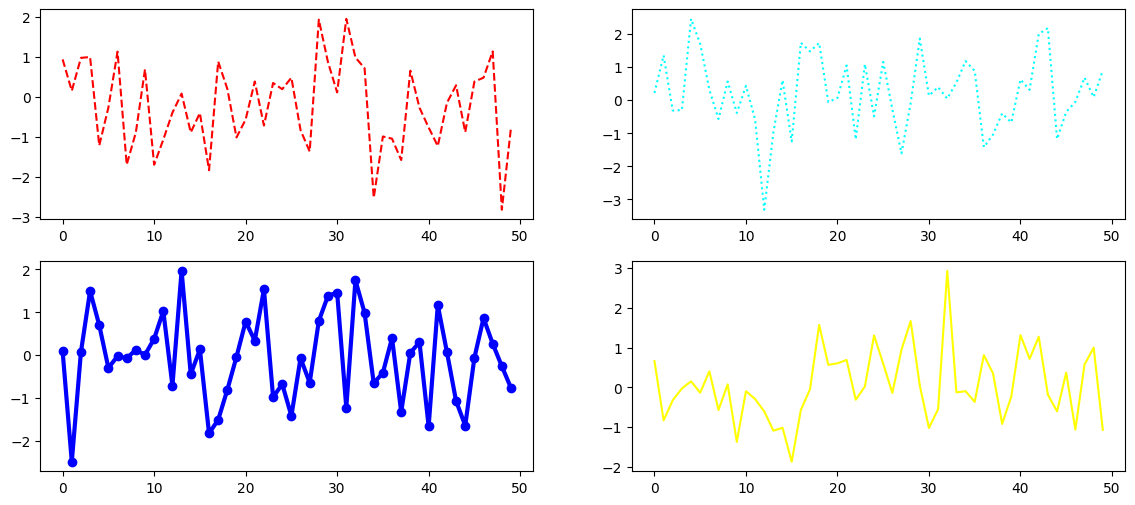

In [18]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='cyan', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)

---
## Otros tipos de graficos


### Scatter

---

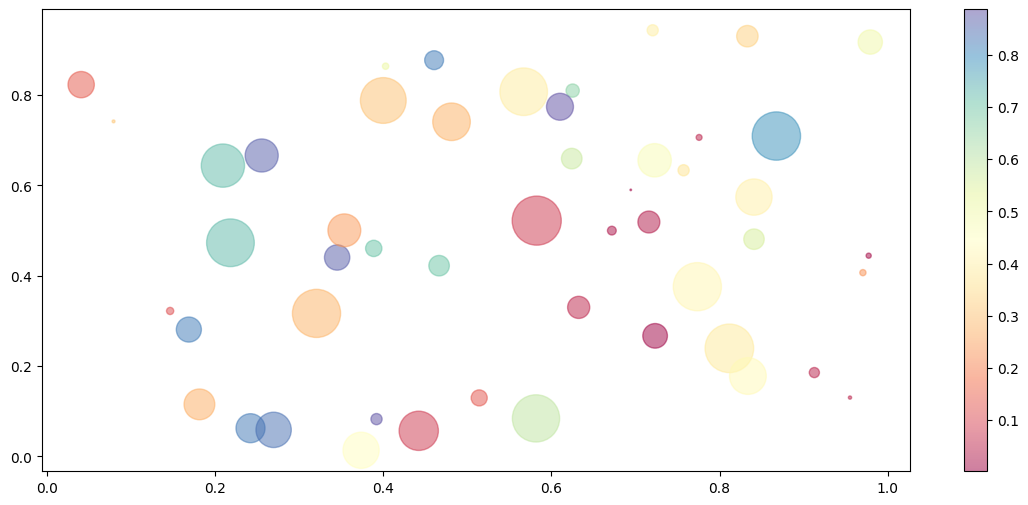

In [19]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii


plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

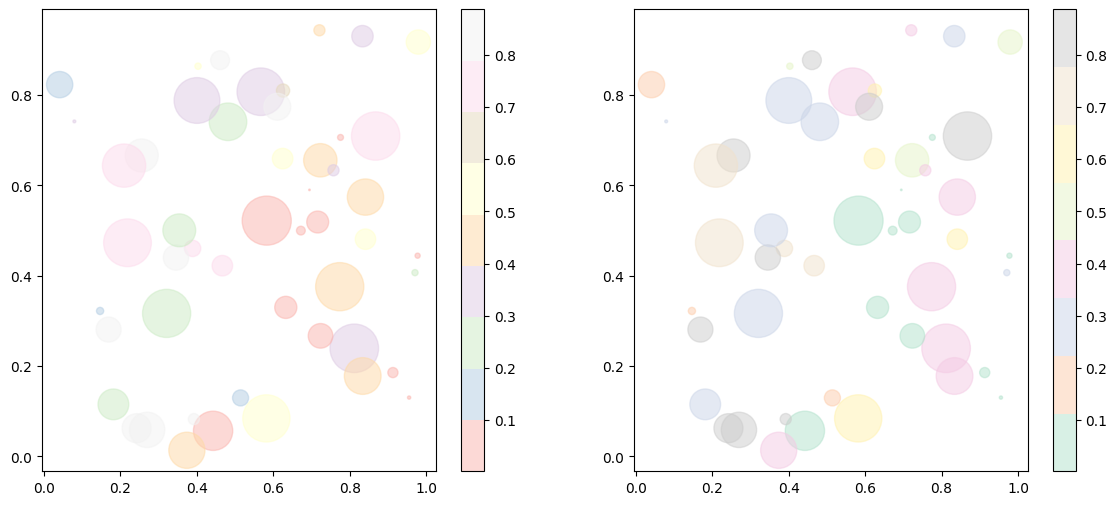

In [20]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

---
### Histogramas

---

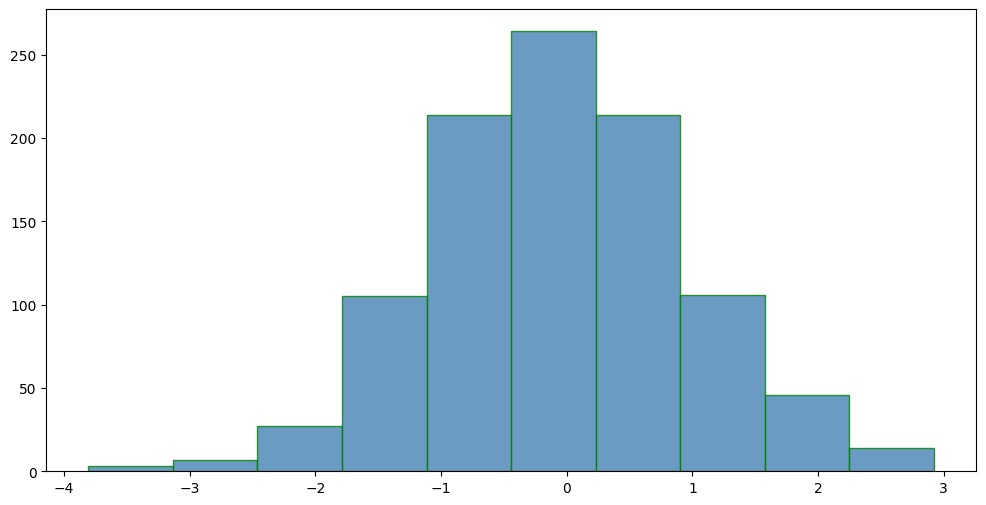

In [23]:
values = np.random.randn(1000)

plt.subplots(figsize=(12, 6))

plt.hist(values, bins=10, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
#plt.xlim(xmin=-5, xmax=5)

plt.show()

---
### KDE (Kernel density estimation)

---

C:\Users\kuens\AppData\Local\Temp\ipykernel_10416\266505330.py:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(values)


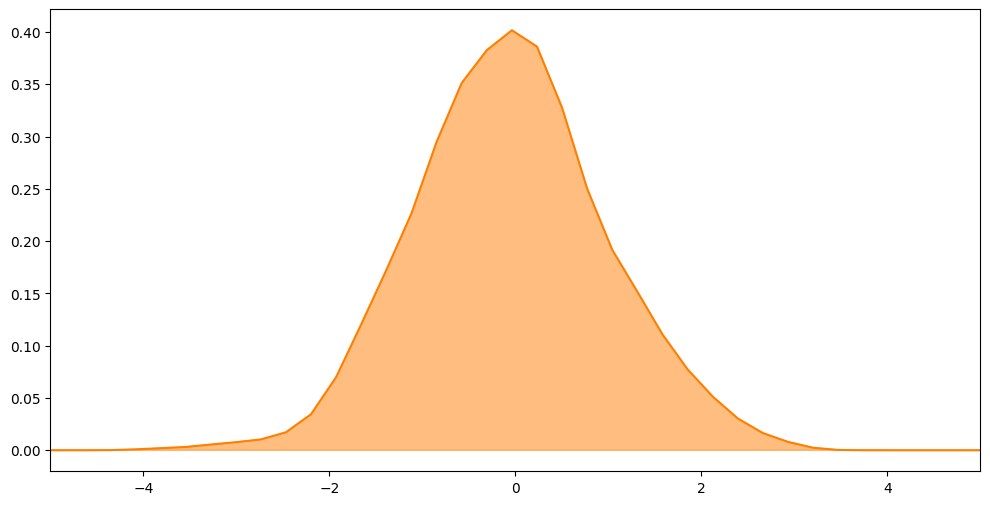

In [27]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
values2 = np.linspace(min(values)-10, max(values)+10, 100)

## 
plt.subplots(figsize=(12, 6))
plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

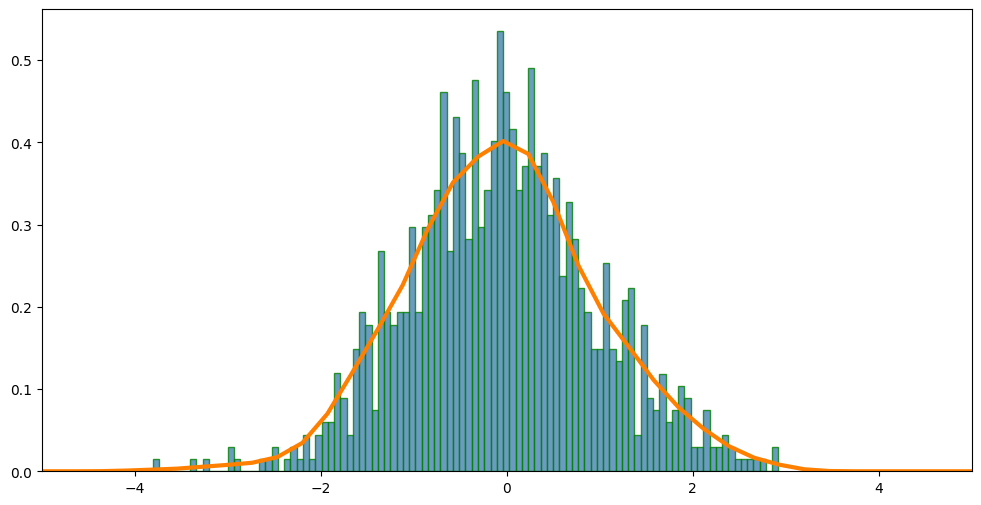

In [28]:
## KDE con histograma

plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

---

### Bar plot

---

In [29]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]



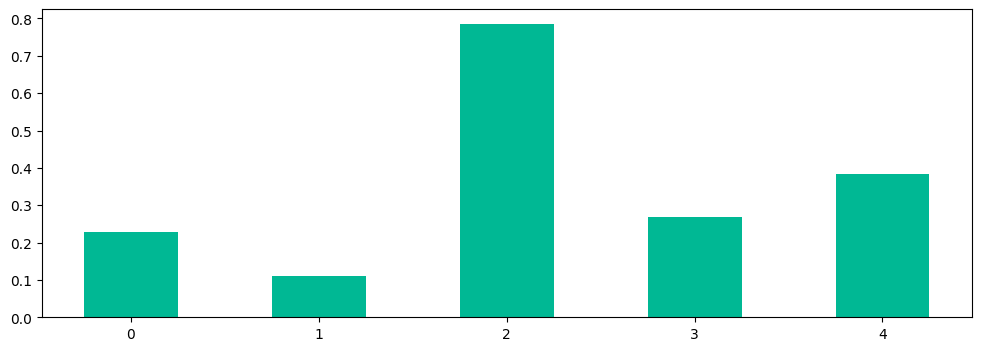

In [30]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

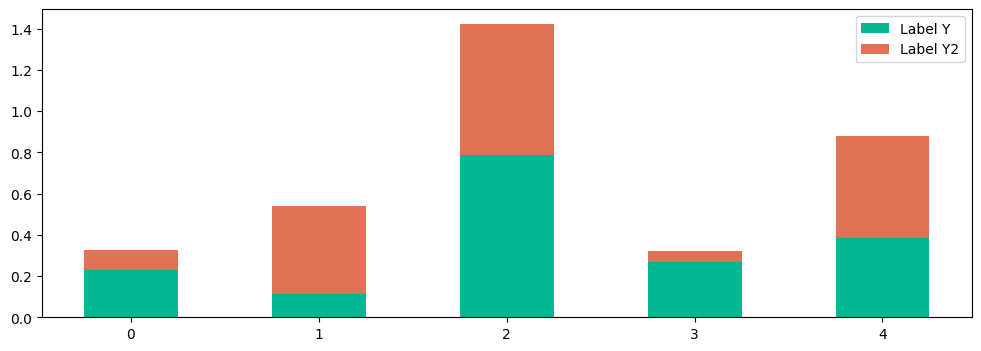

In [31]:
## Podemos stackear barritas
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

---
### Boxplots y deteccion de outliers

---

In [32]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 2., 8., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

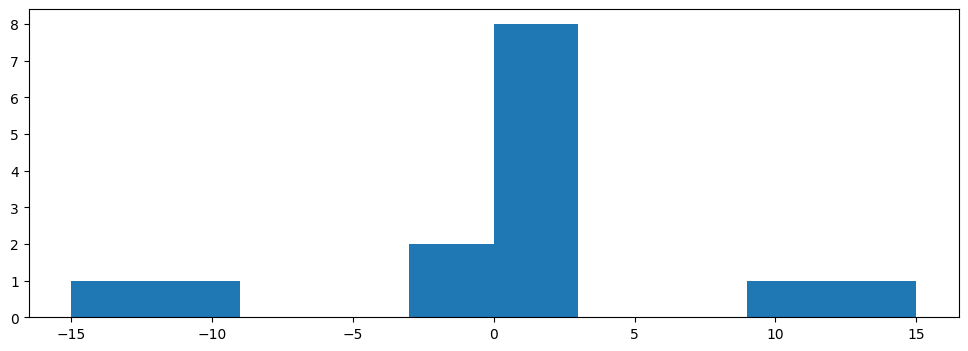

In [33]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x207659acbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x207659affa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x207659ac790>],
 'medians': [<matplotlib.lines.Line2D at 0x207659ac2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20765a01240>],
 'means': []}

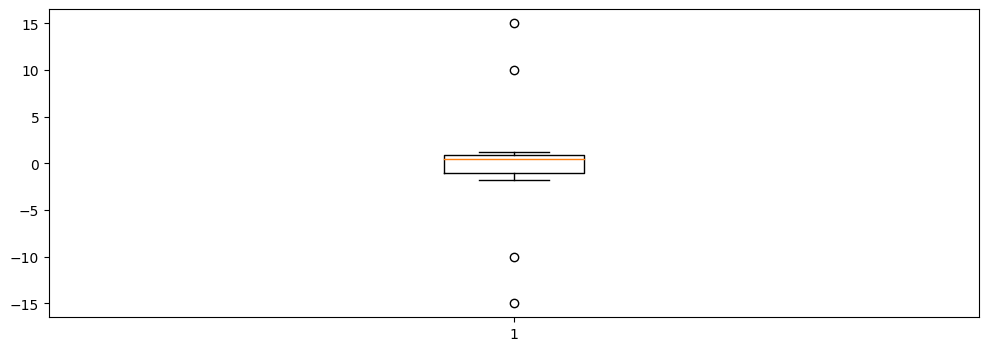

In [34]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)

c:\Users\kuens\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

<AxesSubplot:>

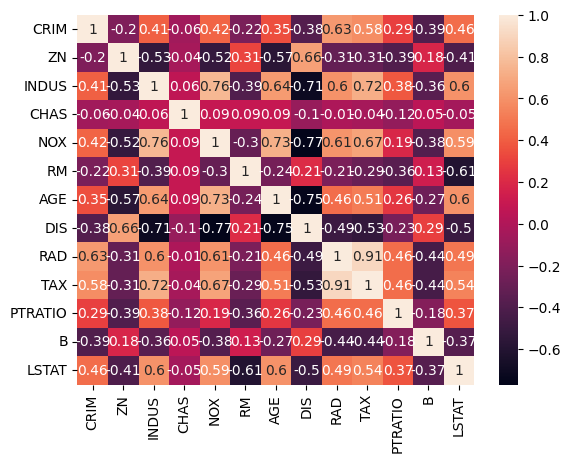

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)


correlation_matrix = boston_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)